In [85]:
%matplotlib inline
# %matplotlib notebook

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [86]:
f_o2022 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2022.gpkg"
f_o2021 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2021.gpkg"
f_o2020 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2020.gpkg"
f_o2019 = r"C:\SEM6\SISS\metadata\ortophoto\sk_orto_2019.gpkg"
f_bdot = r"C:\SEM6\SISS\metadata\bdot\sk_bdot_wfs.gpkg"

orto = {
2022: gpd.read_file(f_o2022),
2021: gpd.read_file(f_o2021),
2020: gpd.read_file(f_o2020),
2019: gpd.read_file(f_o2019),
}

for year in orto.keys():
    orto[year]['timePosition'] = pd.to_datetime(orto[year]['timePosition'])

In [87]:
wybrany_df = orto[2022]  # przerobione: 2022
wybrany_df.tail(3)

,gml_id,godlo,akt_rok,piksel,kolor,zrodlo_danych,uklad_xy,modul_archiwizacji,nr_zglosz,timePosition,czy_ark_wypelniony,url_do_pobrania,wlk_pliku_MB,geometry
65519,SkorowidzOrtofomapy2022.1151642,N-34-107-B-b-4-4,2022,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2022,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,54,"POLYGON ((797880.230 609366.310, 797843.980 60..."
65520,SkorowidzOrtofomapy2022.1151986,N-34-108-A-a-3-4,2022,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2022,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,55,"POLYGON ((802043.930 609628.930, 802007.160 61..."
65521,SkorowidzOrtofomapy2022.1151669,N-34-107-B-c-4-1,2022,0.25,CIR,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2022,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,58,"POLYGON ((787890.120 601780.560, 787855.170 60..."


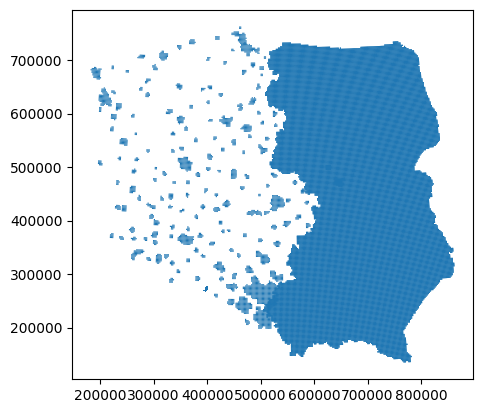

In [88]:
wybrany_df.plot()
plt.show()

0.25    61540
0.05     3918
0.10       64
Name: piksel, dtype: int64 
---------------------------
 piksel  uklad_xy  
0.25    PL-1992       61540
0.05    PL-1992        3692
        PL-2000:S7      226
0.10    PL-2000:S6       64
dtype: int64


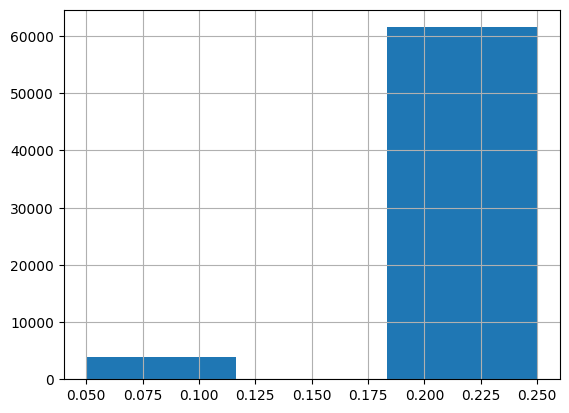

In [89]:
wybrany_df['piksel'].hist(bins=wybrany_df['piksel'].unique().size)
print(wybrany_df['piksel'].value_counts(), f"\n{'-'*27}\n", wybrany_df[['piksel', 'uklad_xy']].value_counts(['piksel', 'uklad_xy']))
plt.show()

# BDOT TESTY

In [90]:
bdot = gpd.read_file(f_bdot)
bdot['Data_aktualizacji'] = pd.to_datetime(bdot['Data_aktualizacji'])
# bdot['x_rok_aktualizacji'] = bdot['Data_aktualizacji'].str[0:4].astype(np.int64)
bdot.tail(3)

,TERYT,NAZWA_POWIATU,Data_aktualizacji,URL_GML,URL_SHP,geometry
377,0413,powiat sępoleński,2022-10-27,https://opendata.geoportal.gov.pl/bdot10k/04/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((384997.245 615178.269, 384988.598 61..."
378,3019,powiat pilski,2022-12-08,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((342585.530 579834.380, 342574.517 57..."
379,1007,powiat opoczyński,2023-03-06,https://opendata.geoportal.gov.pl/bdot10k/10/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((567254.789 396468.679, 567047...."


In [91]:
bdot[bdot.duplicated(['NAZWA_POWIATU'], keep=False)].sort_values('NAZWA_POWIATU', ascending=False)

,TERYT,NAZWA_POWIATU,Data_aktualizacji,URL_GML,URL_SHP,geometry
49,0617,powiat świdnicki,2022-07-05,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((759551.172 380792.027, 759535.296 38..."
252,0219,powiat świdnicki,2022-08-03,https://opendata.geoportal.gov.pl/bdot10k/02/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((303548.256 353247.525, 303543.033 35..."
208,0218,powiat średzki,2023-01-19,https://opendata.geoportal.gov.pl/bdot10k/02/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((325175.889 376263.038, 325084.458 37..."
251,3025,powiat średzki,2023-01-09,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((394117.803 464090.388, 394120.517 46..."
21,0618,powiat tomaszowski,2021-10-20,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((823834.320 274964.749, 823853.532 27..."
100,1016,powiat tomaszowski,2023-03-15,https://opendata.geoportal.gov.pl/bdot10k/10/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((567462.833 396513.089, 567710...."
259,3017,powiat ostrowski,2022-06-01,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((432021.478 430087.762, 432001.585 43..."
361,1416,powiat ostrowski,2022-12-05,https://opendata.geoportal.gov.pl/bdot10k/14/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((707459.439 539728.824, 707476.237 53..."
44,0612,powiat opolski,2021-11-29,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"POLYGON ((696002.052 376874.084, 695991.760 37..."
257,1609,powiat opolski,2023-02-09,https://opendata.geoportal.gov.pl/bdot10k/16/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,"MULTIPOLYGON (((430761.880 343840.032, 430661...."


# ŁĄCZENIE - INTERSECTION / UNION / SJOIN

In [92]:
mega_df = bdot.sjoin(wybrany_df, how="right", lsuffix='bdot', rsuffix='orto')

In [93]:
mega_df.columns

Index(['index_bdot', 'TERYT', 'NAZWA_POWIATU', 'Data_aktualizacji', 'URL_GML',
       'URL_SHP', 'gml_id', 'godlo', 'akt_rok', 'piksel', 'kolor',
       'zrodlo_danych', 'uklad_xy', 'modul_archiwizacji', 'nr_zglosz',
       'timePosition', 'czy_ark_wypelniony', 'url_do_pobrania', 'wlk_pliku_MB',
       'geometry'],
      dtype='object')

In [94]:
mega_df.tail(3)

,index_bdot,TERYT,NAZWA_POWIATU,Data_aktualizacji,URL_GML,URL_SHP,gml_id,godlo,akt_rok,piksel,kolor,zrodlo_danych,uklad_xy,modul_archiwizacji,nr_zglosz,timePosition,czy_ark_wypelniony,url_do_pobrania,wlk_pliku_MB,geometry
65519,366.0,2002,powiat białostocki,2023-01-24,https://opendata.geoportal.gov.pl/bdot10k/20/2...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1151642,N-34-107-B-b-4-4,2022,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2022,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,54,"POLYGON ((797880.230 609366.310, 797843.980 60..."
65520,339.0,2011,powiat sokólski,2023-01-19,https://opendata.geoportal.gov.pl/bdot10k/20/2...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1151986,N-34-108-A-a-3-4,2022,0.25,RGB,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2022,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,55,"POLYGON ((802043.930 609628.930, 802007.160 61..."
65521,366.0,2002,powiat białostocki,2023-01-24,https://opendata.geoportal.gov.pl/bdot10k/20/2...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1151669,N-34-107-B-c-4-1,2022,0.25,CIR,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2022,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,58,"POLYGON ((787890.120 601780.560, 787855.170 60..."


In [95]:
#mega_df[mega_df.isna().any(axis=1)] # 25 arkuszy poza granicami Polski
#mega_df[mega_df.isna().any(axis=1)].to_file("test.gpkg", layer='test', driver="GPKG")
mega_df.dropna(inplace=True) # 25 arkuszy poza granicami Polski

# mega_df.describe()
mega_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 82973 entries, 0 to 65521
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index_bdot          82973 non-null  float64       
 1   TERYT               82973 non-null  object        
 2   NAZWA_POWIATU       82973 non-null  object        
 3   Data_aktualizacji   82973 non-null  datetime64[ns]
 4   URL_GML             82973 non-null  object        
 5   URL_SHP             82973 non-null  object        
 6   gml_id              82973 non-null  object        
 7   godlo               82973 non-null  object        
 8   akt_rok             82973 non-null  int64         
 9   piksel              82973 non-null  float64       
 10  kolor               82973 non-null  object        
 11  zrodlo_danych       82973 non-null  object        
 12  uklad_xy            82973 non-null  object        
 13  modul_archiwizacji  82973 non-null  ob

In [96]:
mega_df['time_diff'] = mega_df['Data_aktualizacji'] - mega_df['timePosition']

In [97]:
mega_df

,index_bdot,TERYT,NAZWA_POWIATU,Data_aktualizacji,URL_GML,URL_SHP,gml_id,godlo,akt_rok,piksel,...,zrodlo_danych,uklad_xy,modul_archiwizacji,nr_zglosz,timePosition,czy_ark_wypelniony,url_do_pobrania,wlk_pliku_MB,geometry,time_diff
0,183.0,3009,powiat kolski,2023-03-09,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1075790,N-34-134-A-d-3-2,2022,0.05,...,Zdj. cyfrowe,PL-1992,1:5000,GI-FOTO.6201.4.2022,2022-03-09,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,1177,"POLYGON ((476515.420 481950.630, 476518.170 48...",365 days
1,11.0,3062,powiat Konin,2023-03-09,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1075799,N-34-133-A-b-4-4,2022,0.05,...,Zdj. cyfrowe,PL-1992,1:5000,GI-FOTO.6201.4.2022,2022-03-09,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,1045,"POLYGON ((446701.200 489131.970, 446707.440 48...",365 days
1,12.0,3010,powiat koniński,2022-06-01,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1075799,N-34-133-A-b-4-4,2022,0.05,...,Zdj. cyfrowe,PL-1992,1:5000,GI-FOTO.6201.4.2022,2022-03-09,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,1045,"POLYGON ((446701.200 489131.970, 446707.440 48...",84 days
2,29.0,3011,powiat kościański,2022-06-01,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1075831,N-33-142-C-b-3-3,2022,0.05,...,Zdj. cyfrowe,PL-1992,1:5000,GI-FOTO.6201.4.2022,2022-03-09,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,1108,"POLYGON ((337374.940 472972.760, 337393.880 47...",84 days
3,28.0,3026,powiat śremski,2022-06-01,https://opendata.geoportal.gov.pl/bdot10k/30/3...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1075990,N-33-142-D-b-4-4,2022,0.05,...,Zdj. cyfrowe,PL-1992,1:5000,GI-FOTO.6201.4.2022,2022-03-09,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,1039,"POLYGON ((360910.160 472258.320, 360926.360 47...",84 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65518,366.0,2002,powiat białostocki,2023-01-24,https://opendata.geoportal.gov.pl/bdot10k/20/2...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1152643,N-34-119-B-b-1-1,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2022,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,49,"POLYGON ((793476.500 578884.220, 793441.130 57...",139 days
65519,339.0,2011,powiat sokólski,2023-01-19,https://opendata.geoportal.gov.pl/bdot10k/20/2...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1151642,N-34-107-B-b-4-4,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2022,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,54,"POLYGON ((797880.230 609366.310, 797843.980 60...",134 days
65519,366.0,2002,powiat białostocki,2023-01-24,https://opendata.geoportal.gov.pl/bdot10k/20/2...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1151642,N-34-107-B-b-4-4,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2022,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,54,"POLYGON ((797880.230 609366.310, 797843.980 60...",139 days
65520,339.0,2011,powiat sokólski,2023-01-19,https://opendata.geoportal.gov.pl/bdot10k/20/2...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1151986,N-34-108-A-a-3-4,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2022,2022-09-07,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,55,"POLYGON ((802043.930 609628.930, 802007.160 61...",134 days


In [98]:
days = pd.Timedelta(days=20)
mask = (mega_df['time_diff'] > -days) & (mega_df['time_diff'] <= days)

mega_df.loc[mask].sort_values(by='time_diff')

,index_bdot,TERYT,NAZWA_POWIATU,Data_aktualizacji,URL_GML,URL_SHP,gml_id,godlo,akt_rok,piksel,...,zrodlo_danych,uklad_xy,modul_archiwizacji,nr_zglosz,timePosition,czy_ark_wypelniony,url_do_pobrania,wlk_pliku_MB,geometry,time_diff
42393,46.0,0614,powiat puławski,2022-05-31,https://opendata.geoportal.gov.pl/bdot10k/06/0...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1141651,M-34-21-C-c-4-2,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2022,2022-06-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,50,"POLYGON ((715269.390 393782.530, 715244.950 39...",-19 days
44700,368.0,1804,powiat jarosławski,2022-05-31,https://opendata.geoportal.gov.pl/bdot10k/18/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1147297,M-34-82-B-a-3-2,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2022,2022-06-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,42,"POLYGON ((771139.340 238611.880, 771110.050 23...",-19 days
41885,368.0,1804,powiat jarosławski,2022-05-31,https://opendata.geoportal.gov.pl/bdot10k/18/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1136586,M-34-70-D-d-4-2,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2022,2022-06-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,42,"POLYGON ((784088.600 248567.650, 784057.830 24...",-19 days
44684,368.0,1804,powiat jarosławski,2022-05-31,https://opendata.geoportal.gov.pl/bdot10k/18/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1146186,M-34-70-D-a-4-1,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2022,2022-06-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,44,"POLYGON ((772433.760 257243.770, 772404.160 25...",-19 days
41918,368.0,1804,powiat jarosławski,2022-05-31,https://opendata.geoportal.gov.pl/bdot10k/18/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1147308,M-34-82-B-a-4-4,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.002.2022,2022-06-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,45,"POLYGON ((775738.870 236525.650, 775709.110 23...",-19 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32301,136.0,1261,powiat Kraków,2022-06-21,https://opendata.geoportal.gov.pl/bdot10k/12/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1086053,M-34-65-C-c-4-1,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.003.2022,2022-06-03,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,35,"POLYGON ((576065.070 241561.510, 576056.850 24...",18 days
32309,134.0,1263,powiat Tarnów,2022-06-21,https://opendata.geoportal.gov.pl/bdot10k/12/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1086806,M-34-67-C-c-3-2,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.003.2022,2022-06-03,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,41,"POLYGON ((645414.670 242996.930, 645398.940 24...",18 days
32323,136.0,1261,powiat Kraków,2022-06-21,https://opendata.geoportal.gov.pl/bdot10k/12/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1087276,M-34-76-B-b-2-4,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.003.2022,2022-06-03,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,42,"POLYGON ((569443.560 234523.530, 569436.060 23...",18 days
32590,136.0,1261,powiat Kraków,2022-06-21,https://opendata.geoportal.gov.pl/bdot10k/12/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1086046,M-34-65-C-c-3-2,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.003.2022,2022-06-03,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,38,"POLYGON ((573827.910 241530.180, 573819.920 24...",18 days


In [99]:
days = pd.Timedelta(days=20)
mask = (mega_df['time_diff'] > pd.Timedelta(days=0)) & (mega_df['time_diff'] <= days)

mega_df.loc[mask].sort_values(by='time_diff')

,index_bdot,TERYT,NAZWA_POWIATU,Data_aktualizacji,URL_GML,URL_SHP,gml_id,godlo,akt_rok,piksel,...,zrodlo_danych,uklad_xy,modul_archiwizacji,nr_zglosz,timePosition,czy_ark_wypelniony,url_do_pobrania,wlk_pliku_MB,geometry,time_diff
42796,136.0,1261,powiat Kraków,2022-06-21,https://opendata.geoportal.gov.pl/bdot10k/12/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1086025,M-34-65-C-b-4-3,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.003.2022,2022-06-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,37,"POLYGON ((584903.280 248642.970, 584894.070 24...",2 days
43258,136.0,1261,powiat Kraków,2022-06-21,https://opendata.geoportal.gov.pl/bdot10k/12/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1086024,M-34-65-C-b-4-3,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.003.2022,2022-06-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,37,"POLYGON ((584903.280 248642.970, 584894.070 24...",2 days
43321,136.0,1261,powiat Kraków,2022-06-21,https://opendata.geoportal.gov.pl/bdot10k/12/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1086062,M-34-65-C-d-1-2,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.003.2022,2022-06-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,38,"POLYGON ((582704.880 246292.240, 582695.920 24...",2 days
43459,136.0,1261,powiat Kraków,2022-06-21,https://opendata.geoportal.gov.pl/bdot10k/12/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1085683,M-34-64-D-b-4-2,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.003.2022,2022-06-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,40,"POLYGON ((569233.450 250732.670, 569225.940 25...",2 days
43565,136.0,1261,powiat Kraków,2022-06-21,https://opendata.geoportal.gov.pl/bdot10k/12/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1085984,M-34-65-C-a-3-3,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.003.2022,2022-06-19,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,42,"POLYGON ((571497.760 248446.630, 571490.010 24...",2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32858,136.0,1261,powiat Kraków,2022-06-21,https://opendata.geoportal.gov.pl/bdot10k/12/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1086050,M-34-65-C-c-3-4,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.003.2022,2022-06-03,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,42,"POLYGON ((573859.850 239214.510, 573851.870 23...",18 days
32809,136.0,1261,powiat Kraków,2022-06-21,https://opendata.geoportal.gov.pl/bdot10k/12/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1085653,M-34-64-D-a-4-3,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.003.2022,2022-06-03,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,44,"POLYGON ((558092.100 248283.950, 558085.810 24...",18 days
32784,136.0,1261,powiat Kraków,2022-06-21,https://opendata.geoportal.gov.pl/bdot10k/12/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1086077,M-34-65-C-d-3-1,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.003.2022,2022-06-03,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,34,"POLYGON ((580539.390 241626.990, 580530.680 24...",18 days
32574,136.0,1261,powiat Kraków,2022-06-21,https://opendata.geoportal.gov.pl/bdot10k/12/1...,https://opendata.geoportal.gov.pl/bdot10k/SHP/...,SkorowidzOrtofomapy2022.1085725,M-34-64-D-d-1-3,2022,0.25,...,Zdj. cyfrowe,PL-1992,1:5000,DFT.7201.003.2022,2022-06-03,TAK,https://opendata.geoportal.gov.pl/ortofotomapa...,43,"POLYGON ((562614.920 243703.030, 562608.140 24...",18 days
